In [1]:
import numpy as np
import tensorflow as tf

In [2]:
physical_devices = tf.config.list_physical_devices('GPU')
print("num GPU: ", len(physical_devices))
tf.config.experimental.set_memory_growth(physical_devices[0], True)

num GPU:  1


In [3]:
mobile = tf.keras.applications.mobilenet_v2.MobileNetV2()

In [4]:
from tensorflow.keras.preprocessing import image

def prepare_image(file):

    img = image.load_img(file, target_size=(224,224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array,axis=0)
    return tf.keras.applications.mobilenet_v2.preprocess_input(img_array_expanded_dims)

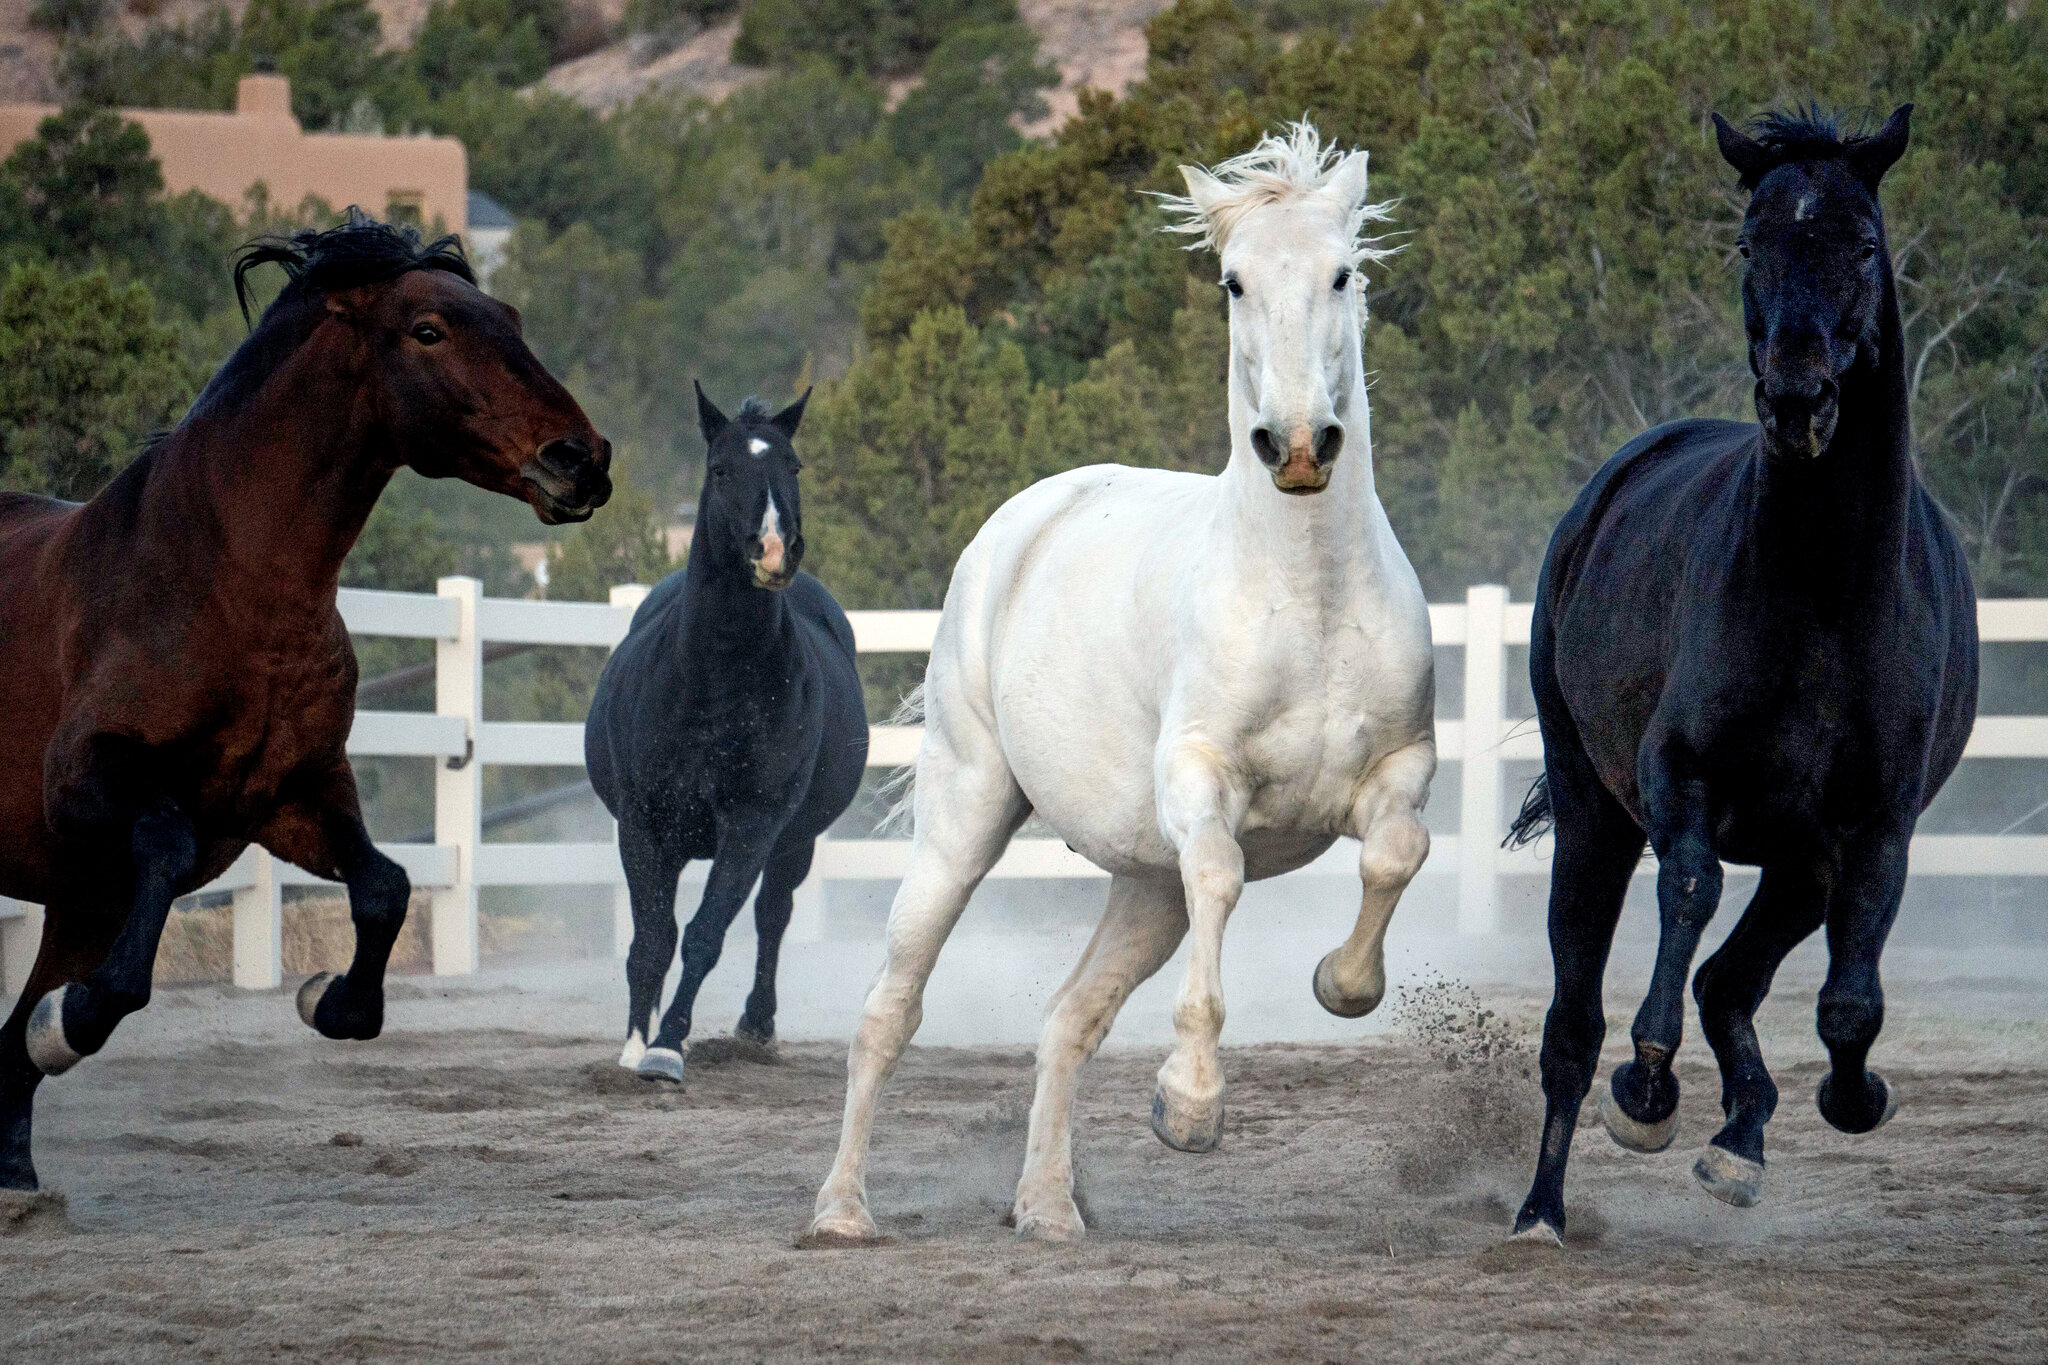

In [5]:
from IPython.display import Image
Image(filename="19EQUUS-1-superJumbo-v4.jpg",width=500,height=500)

In [6]:
preprossed_img = prepare_image("19EQUUS-1-superJumbo-v4.jpg")
predictions = mobile.predict(preprossed_img)
results = tf.keras.applications.imagenet_utils.decode_predictions(predictions)
results

35363/35363 [==============================] - 0s 1us/step


[[('n02437616', 'llama', 0.6150693),
  ('n02437312', 'Arabian_camel', 0.06699849),
  ('n02412080', 'ram', 0.0460196),
  ('n02099429', 'curly-coated_retriever', 0.0066845794),
  ('n01514668', 'cock', 0.00574286)]]

Data preprocessing

In [3]:
from tensorflow.keras.preprocessing import image

In [4]:
cd Untitled Folder 1

[WinError 2] The system cannot find the file specified: 'Untitled Folder 1'
C:\Users\danud\Untitled Folder 1


In [5]:
train_dir = "FOREST_FIRE_SMOKE_AND_NON_FIRE_DATASET/train"
valid_dir = "FOREST_FIRE_SMOKE_AND_NON_FIRE_DATASET/valid"

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

In [7]:
train_batches = ImageDataGenerator(preprocessing_function=preprocess_input).flow_from_directory(
    directory=train_dir, target_size=(224,224), batch_size=32)
valid_batches = ImageDataGenerator(preprocessing_function=preprocess_input).flow_from_directory(
    directory=valid_dir, target_size=(224,224), batch_size=32)

Found 31705 images belonging to 3 classes.
Found 5994 images belonging to 3 classes.


In [8]:
mobile = tf.keras.applications.mobilenet_v2.MobileNetV2()

In [9]:
mobile.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

In [10]:
print(len(mobile.layers))

156


In [11]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model

In [12]:
x = mobile.layers[-2].output
output = Dense(units=3, activation='softmax')(x)

In [13]:
model = Model(inputs=mobile.input,outputs=output)

In [14]:
for layer in model.layers[:-1]:
    layer.trainable = False

In [15]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

In [16]:
from tensorflow.keras.optimizers import Adam

model.compile(
    optimizer=Adam(lr=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

C:\Users\danud\.conda\envs\tfw\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [17]:
model.fit(x=train_batches, validation_data=valid_batches,epochs=30,verbose=2)

Epoch 1/30
991/991 - 415s - loss: 0.3092 - accuracy: 0.8976 - val_loss: 0.1507 - val_accuracy: 0.9603 - 415s/epoch - 419ms/step
Epoch 2/30
991/991 - 222s - loss: 0.1364 - accuracy: 0.9610 - val_loss: 0.1152 - val_accuracy: 0.9663 - 222s/epoch - 224ms/step
Epoch 3/30
991/991 - 213s - loss: 0.1118 - accuracy: 0.9666 - val_loss: 0.1009 - val_accuracy: 0.9696 - 213s/epoch - 215ms/step
Epoch 4/30
991/991 - 211s - loss: 0.0989 - accuracy: 0.9698 - val_loss: 0.0935 - val_accuracy: 0.9705 - 211s/epoch - 213ms/step
Epoch 5/30
991/991 - 218s - loss: 0.0903 - accuracy: 0.9720 - val_loss: 0.0886 - val_accuracy: 0.9728 - 218s/epoch - 220ms/step
Epoch 6/30
991/991 - 211s - loss: 0.0839 - accuracy: 0.9746 - val_loss: 0.0829 - val_accuracy: 0.9735 - 211s/epoch - 213ms/step
Epoch 7/30
991/991 - 214s - loss: 0.0791 - accuracy: 0.9756 - val_loss: 0.0790 - val_accuracy: 0.9756 - 214s/epoch - 216ms/step
Epoch 8/30
991/991 - 212s - loss: 0.0750 - accuracy: 0.9770 - val_loss: 0.0760 - val_accuracy: 0.9755 - 

In [18]:
model.save('mobileNetv2-model.keras')

In [21]:
classes = train_batches.class_indices

In [22]:
classes

{'Smoke': 0, 'fire': 1, 'non fire': 2}

In [23]:
from tensorflow.keras.preprocessing import image

def prepare_image(file):

    img = image.load_img(file, target_size=(224,224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array,axis=0)
    return tf.keras.applications.mobilenet_v2.preprocess_input(img_array_expanded_dims)

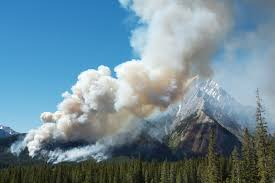

In [27]:
from IPython.display import Image
Image(filename="Smoke(2302).jpg",width=500,height=500)

In [28]:
preprossed_img = prepare_image("Smoke(2302).jpg")
predictions = model.predict(preprossed_img)

1/1 [==============================] - 0s 23ms/step


In [29]:
print(predictions)
print(np.argmax(predictions))

[[6.8290889e-01 3.1653994e-01 5.5122585e-04]]
0
